In [2]:
import pandas as pd
import numpy as np

print(pd.__version__)
print(np.__version__)

1.2.1
1.19.2


# Task 1

Какие компоненты обычно выделяют во временных рядах?

Ответ (1 балов):

- Цикл

- Сезонность

- Тренд

- Ошибка

# Task 2

Какие особенности характерны для временных рядов?

Ответ (0 балов):

- Временной ряд — это набор пар (t,yt)(t, y_t)(t,yt​), где ttt — произвольные моменты времени, а yty_tyt​ — значения признака yyy в эти моменты


- Временные ряды, как правило, автокоррелированы, то есть, их значения в каждый момент времени в каком-то смысле похожи на значения в недавнем прошлом.

Ответ (0 балов):

- Значение признака, измерения которого составляют ряд, могут колебаться, но их распределение во времени не меняется

- Временные ряды, как правило, автокоррелированы, то есть, их значения в каждый момент времени в каком-то смысле похожи на значения в недавнем прошлом.

Ответ (0 балов):

- Значение признака, измерения которого составляют ряд, могут колебаться, но их распределение во времени не меняется

# Task 3

Из каких слагаемых состоит модель ARMA(p,q)?

Ответ (1 балов):

- $p$ предыдущих значений ряда с постоянными коэффициентами

- Ошибка $ε_t$

- Константа $α$

# Task 4

Какие из параметров модели SARIMA настраиваются с помощью метода наименьших квадратов?

Ответ (1 балов):

- Значения коэффициентов $\phi$ и $\theta$ перед предыдущими значениями ряда и предыдущими значениями ошибки

- Значение константы $α$

# Task 5

Какой эвристический метод позволяет выбрать начальное приближение для гиперпараметров p и P в сезонной модели ARIMA? 

Ответ (1 балов):

- Анализ частичной автокорреляционной функции

# Task 6

В приложенном файле — данные по ежемесячному уровню производства молока в фунтах на одну корову:

Загрузите ряд, создайте новый ряд значений среднего дневного уровня производства молока в фунтах на одну корову, поделив на число дней в месяце (вычисляется с помощью функции monthrange из пакета calendar). Постройте график полученного ряда; какой из приведённых ниже графиков у вас получился?

In [3]:
milk = pd.read_csv('monthly-milk-production.csv',';', index_col=['month'], parse_dates=['month'], dayfirst=True)

In [4]:
milk['milk_daily'] = milk.milk.values.flatten() / milk.index.days_in_month

<AxesSubplot:xlabel='month'>

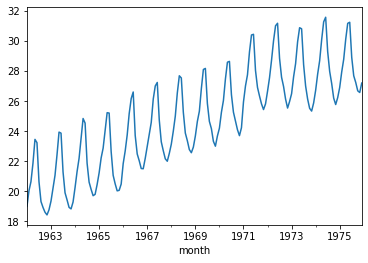

In [5]:
milk.milk_daily.plot()

# Task 7

Для ряда со средним дневным количеством молока на корову из предыдущего вопроса давайте с помощью критерия Дики-Фуллера подберём порядок дифференцирования, при котором ряд становится стационарным. 

Дифференцирование можно делать так:

In [12]:
milk['milk_daily_diff1'] = milk.milk_daily - milk.milk_daily.shift(1)

Чтобы сделать сезонное дифференцирование, нужно изменить значение параметра у функции shift:

In [13]:
milk['milk_daily_diff12'] = milk.milk_daily - milk.milk_daily.shift(12)

При дифференцировании длина ряда сокращается, поэтому в части строк в новой колонке значения будут не определены (NaN). Подавая полученные столбцы на вход критерию Дики-Фуллера, отрезайте неопределённые значения, иначе вы получите неопределённый достигаемый уровень значимости. 

Итак, какое дифференцирование делает ряд стационарным?

In [6]:
import statsmodels.api as sm

In [15]:
Dickey_Fuller_test1 = sm.tsa.stattools.adfuller(milk['milk'])
Dickey_Fuller_test2 = sm.tsa.stattools.adfuller(milk['milk_daily_diff1'].dropna())
Dickey_Fuller_test3 = sm.tsa.stattools.adfuller(milk['milk_daily_diff12'].dropna())

In [18]:
print(f'Dickey-Fuller test on stationary for original series p = {Dickey_Fuller_test1[1]}')
print(f'Dickey-Fuller test on stationary for 1 diff series p = {Dickey_Fuller_test2[1]}')
print(f'Dickey-Fuller test on stationary for 12 diff series p = {Dickey_Fuller_test3[1]}')

Dickey-Fuller test on stationary for original series p = 0.6274267086030337
Dickey-Fuller test on stationary for 1 diff series p = 0.06430054654174037
Dickey-Fuller test on stationary for 12 diff series p = 0.22127672658830383


In [19]:
milk['milk_daily_diff12and1'] = milk.milk_daily - milk.milk_daily.shift(12)

In [20]:
milk['milk_daily_diff12and1'] = milk.milk_daily_diff12and1 - milk.milk_daily_diff12and1.shift(1)

In [24]:
Dickey_Fuller_test4 = sm.tsa.stattools.adfuller(milk['milk_daily_diff12and1'].dropna())

In [25]:
print(f'Dickey-Fuller test on stationary for 12 diff series p = {Dickey_Fuller_test4[1]}')

Dickey-Fuller test on stationary for 12 diff series p = 2.2808455518037347e-06


<AxesSubplot:xlabel='month'>

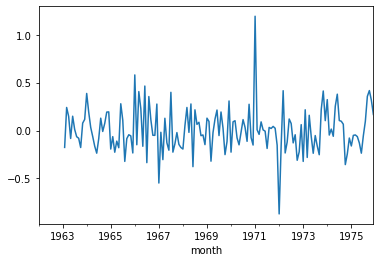

In [26]:
milk.milk_daily_diff12and1.plot()

Ответ (1 балов):

- 

# Task 8

Для стационарного ряда из предыдущего вопроса (продифференцированного столько раз, сколько вы посчитали нужным) постройте график автокорреляционной функции. Это можно cделать так:

In [27]:
#import statsmodels.api as sm
# sm.graphics.tsa.plot_acf(ряд.values.squeeze(), lags=50)

Исходя из этого графика, какое начальное приближение вы предложили бы для параметра $Q$ в модели SARIMA?

In [28]:
import statsmodels.api as sm

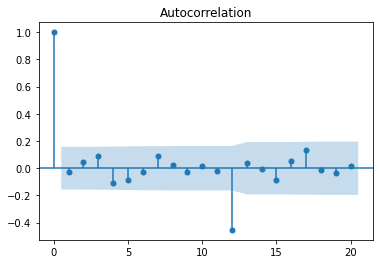

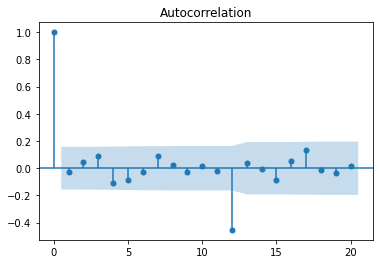

In [46]:
sm.graphics.tsa.plot_acf(milk['milk_daily_diff12and1'].dropna(), lags=20)

Ответ (1 балов):

- $Q=1$

# Task 9

Для того же ряда, что и в предыдущем вопросе, постройте график частичной автокорреляционной функции. Это можно сделать так:

In [35]:
# import statsmodels.api as sm
# sm.graphics.tsa.plot_pacf(ряд.values.squeeze(), lags=50)

Исходя из этого графика, какое начальное приближение вы предложили бы для параметра $p$ в модели SARIMA?

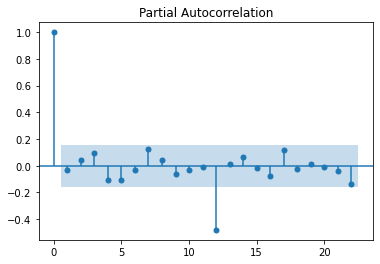

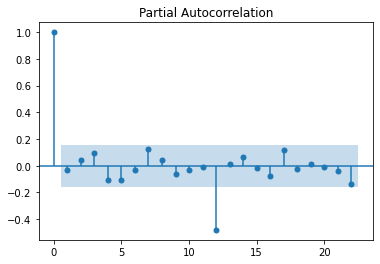

In [37]:
sm.graphics.tsa.plot_pacf(milk['milk_daily_diff12and1'].dropna())

Ответ (1 балов):

- $p=0$